# Î™®Îç∏ Íµ¨ÌòÑ
### ÎùºÏù¥Î∏åÎü¨Î¶¨ Ìò∏Ï∂ú

In [1]:
# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è Î∂ÑÏÑù
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≥ÄÌôò
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
from imblearn.over_sampling import SMOTE

# Î™®Îç∏ÎßÅ Î∞è ÌèâÍ∞Ä
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Íµ∞Ïßë Î∂ÑÏÑù
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ÏãúÍ∞ÅÌôî
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ÏãúÍ∞ÅÌôî Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞ Í∏∞Ï§Ä: ÎßëÏùÄÍ≥†Îîï)
matplotlib.rc('font', family='Malgun Gothic')

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_raw = pd.read_csv("p24_final_withoutAI_data.csv", encoding='utf-8-sig')
df_raw = df_raw.dropna(subset=['ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®'])

In [3]:
# Î™®Îì† Î≥ÄÏàò Ï∂îÍ∞Ä 

### Î™®Îç∏Íµ¨ÌòÑ

##### Random Forest

=== Random Forest (Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞, Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞ Ìè¨Ìï®) ===
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       578
           1       0.82      0.76      0.79      1158

    accuracy                           0.72      1736
   macro avg       0.70      0.71      0.70      1736
weighted avg       0.74      0.72      0.73      1736



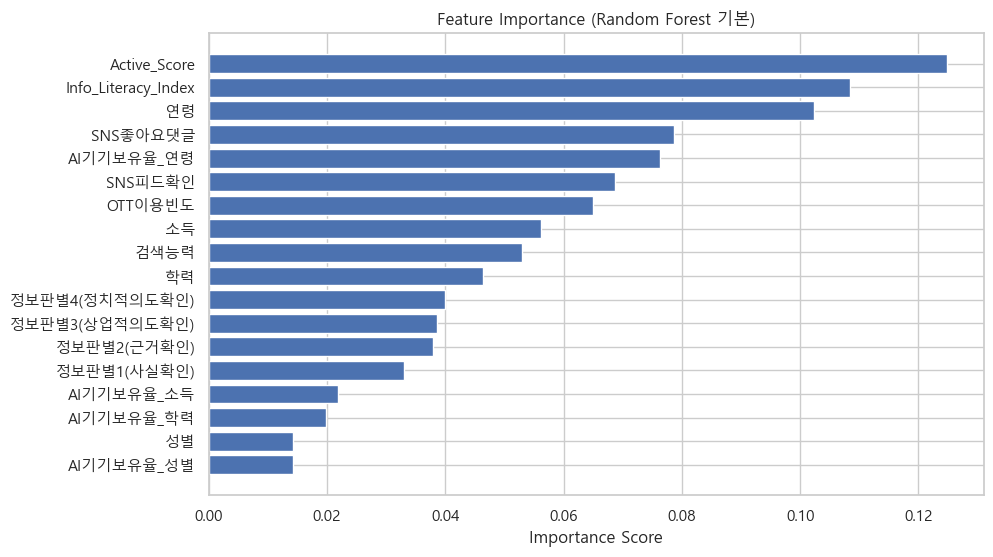

In [4]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = df_raw.copy()

# X, y ÏÑ§Ï†ï
X = df[[
    'ÏÑ±Î≥Ñ', 'Ïó∞Î†π', 'ÌïôÎ†•', 'ÏÜåÎìù', 'Í≤ÄÏÉâÎä•Î†•',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ1(ÏÇ¨Ïã§ÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ2(Í∑ºÍ±∞ÌôïÏù∏)',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ3(ÏÉÅÏóÖÏ†ÅÏùòÎèÑÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ4(Ï†ïÏπòÏ†ÅÏùòÎèÑÌôïÏù∏)',
    'SNSÌîºÎìúÌôïÏù∏', 'SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä', 'OTTÏù¥Ïö©ÎπàÎèÑ',
    'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_ÏÑ±Î≥Ñ', 'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_Ïó∞Î†π', 'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_ÏÜåÎìù', 'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_ÌïôÎ†•',
    'Active_Score', 'Info_Literacy_Index'
]]
y = df['ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®']

# Train-Test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Í≤∞Ï∏°Í∞í Ï†úÍ±∞
X_train_no_na = X_train.dropna()
y_train_no_na = y_train.loc[X_train_no_na.index]
X_test_no_na = X_test.dropna()
y_test_no_na = y_test.loc[X_test_no_na.index]

# SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_na, y_train_no_na)

# Random Forest (Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_no_na)

# ÏÑ±Îä•ÌèâÍ∞Ä Ï∂úÎ†•
print("=== Random Forest (Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞, Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞ Ìè¨Ìï®) ===")
print(classification_report(y_test_no_na, y_pred_rf))

# AI_Device Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
importances = rf_model.feature_importances_
features = X.columns

# Ï§ëÏöîÎèÑ ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importances[sorted_idx])
plt.yticks(range(len(features)), features[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest Í∏∞Î≥∏)")
plt.gca().invert_yaxis()
plt.show()

##### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ 

=== Random Forest (ÌäúÎãù ÌõÑ) ===
ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       578
           1       0.81      0.76      0.79      1158

    accuracy                           0.73      1736
   macro avg       0.70      0.71      0.70      1736
weighted avg       0.74      0.73      0.73      1736


Î≥ÄÏàò Ï§ëÏöîÎèÑ:
                Feature  Importance
16         Active_Score    0.131274
17  Info_Literacy_Index    0.108778
1                    Ïó∞Î†π    0.100555
10             SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä    0.078578
13           AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_Ïó∞Î†π    0.072034
9               SNSÌîºÎìúÌôïÏù∏    0.068995
11              OTTÏù¥Ïö©ÎπàÎèÑ    0.063753
3                    ÏÜåÎìù    0.056186
4                  Í≤ÄÏÉâÎä•Î†•    0.055330
2                    ÌïôÎ†•    0.042244
8        Ï†ïÎ≥¥ÌåêÎ≥Ñ4(Ï†ïÏπòÏ†ÅÏùòÎèÑÌôïÏù∏)    0.039989
7        Ï†ïÎ≥¥ÌåêÎ

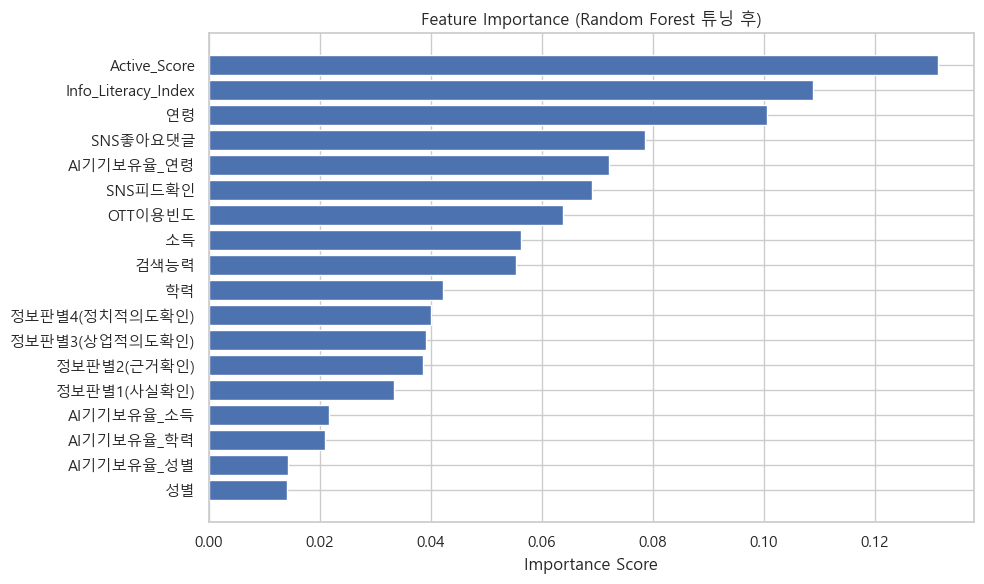

In [5]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = df_raw.copy()

# X, y ÏÑ§Ï†ï
X = df[[
    'ÏÑ±Î≥Ñ', 'Ïó∞Î†π', 'ÌïôÎ†•', 'ÏÜåÎìù', 'Í≤ÄÏÉâÎä•Î†•',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ1(ÏÇ¨Ïã§ÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ2(Í∑ºÍ±∞ÌôïÏù∏)',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ3(ÏÉÅÏóÖÏ†ÅÏùòÎèÑÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ4(Ï†ïÏπòÏ†ÅÏùòÎèÑÌôïÏù∏)',
    'SNSÌîºÎìúÌôïÏù∏', 'SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä', 'OTTÏù¥Ïö©ÎπàÎèÑ',
    'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_ÏÑ±Î≥Ñ', 'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_Ïó∞Î†π', 'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_ÏÜåÎìù', 'AIÍ∏∞Í∏∞Î≥¥Ïú†Ïú®_ÌïôÎ†•',
    'Active_Score', 'Info_Literacy_Index'
]]
y = df['ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®']

# Train-Test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Í≤∞Ï∏°Í∞í Ï†úÍ±∞
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)

# ÏµúÏ†Å Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("=== Random Forest (ÌäúÎãù ÌõÑ) ===")
print("ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

#AI_Device Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî Î∞è Ï∂úÎ†•
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Í∞í Ï∂úÎ†•
print("\nÎ≥ÄÏàò Ï§ëÏöîÎèÑ:")
print(importance_df)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest ÌäúÎãù ÌõÑ)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### ÏãúÍ∞ÅÌôî

##### ÌååÏÉùÎ≥ÄÏàò Ïù¥ÏßÑ Î∂ÑÌè¨ÎèÑ

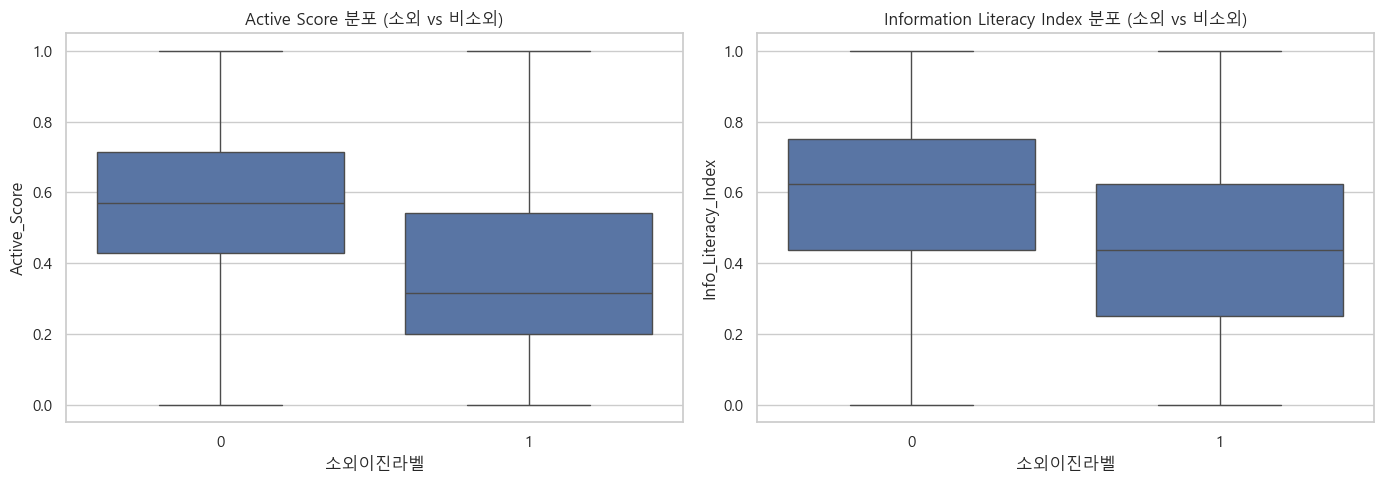

In [6]:
plt.figure(figsize=(14, 5))

# Active_Score
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®', y='Active_Score')
plt.title("Active Score Î∂ÑÌè¨ (ÏÜåÏô∏ vs ÎπÑÏÜåÏô∏)")

# Info_Literacy_Index
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®', y='Info_Literacy_Index')
plt.title("Information Literacy Index Î∂ÑÌè¨ (ÏÜåÏô∏ vs ÎπÑÏÜåÏô∏)")

plt.tight_layout()
plt.show()

##### ÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

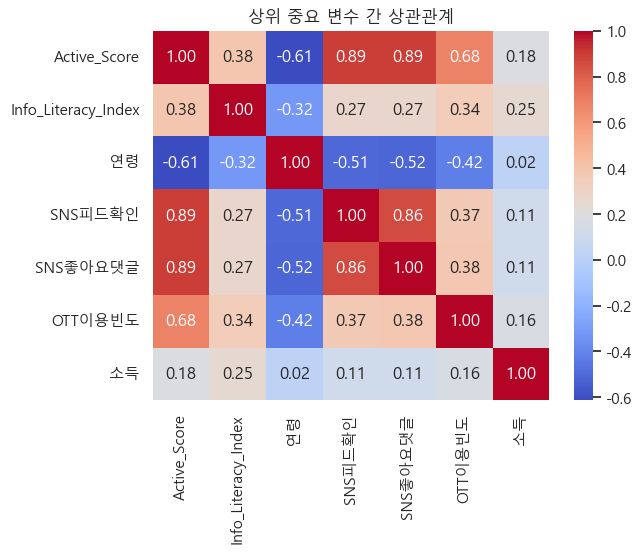

In [7]:
top_features = ['Active_Score', 'Info_Literacy_Index', 'Ïó∞Î†π',
                'SNSÌîºÎìúÌôïÏù∏', 'SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä', 'OTTÏù¥Ïö©ÎπàÎèÑ', 'ÏÜåÎìù']
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("ÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()


##### PCA Í∏∞Î∞ò 2Ï∞®Ïõê Î∂ÑÌè¨

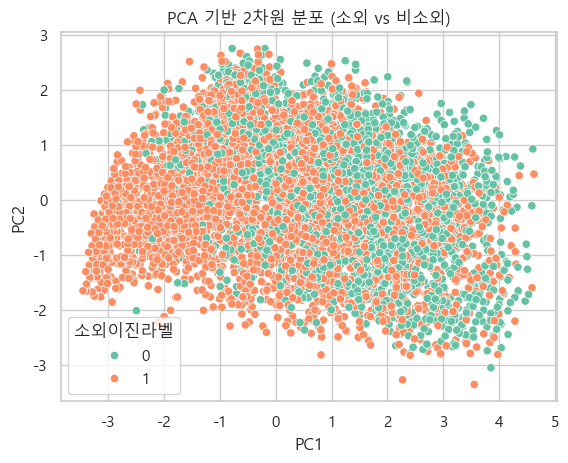

In [8]:
# ÌïÑÏöîÌïú featureÎßå ÏÑ†ÌÉùÌïòÍ≥† Í≤∞Ï∏° Ï†úÍ±∞
X = df[top_features].dropna()

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# ÎùºÎ≤®ÎèÑ Í∞ôÏùÄ Ïù∏Îç±Ïä§ Í∏∞Ï§ÄÏúºÎ°ú ÎßûÏ∂∞ÏÑú ÎÑ£Í∏∞
df_pca['ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®'] = df.loc[X.index, 'ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®'].values

# ÏãúÍ∞ÅÌôî
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='ÏÜåÏô∏Ïù¥ÏßÑÎùºÎ≤®', palette='Set2')
plt.title("PCA Í∏∞Î∞ò 2Ï∞®Ïõê Î∂ÑÌè¨ (ÏÜåÏô∏ vs ÎπÑÏÜåÏô∏)")
plt.show()


##### ÏòàÏ∏°Ïú®

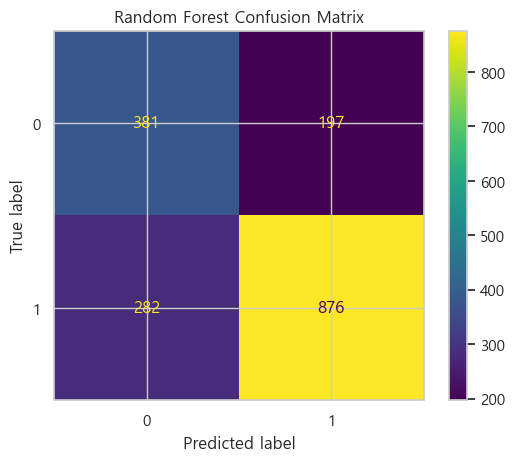

In [9]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_no_na, y_test_no_na)
plt.title("Random Forest Confusion Matrix")
plt.show()

### Kmeans

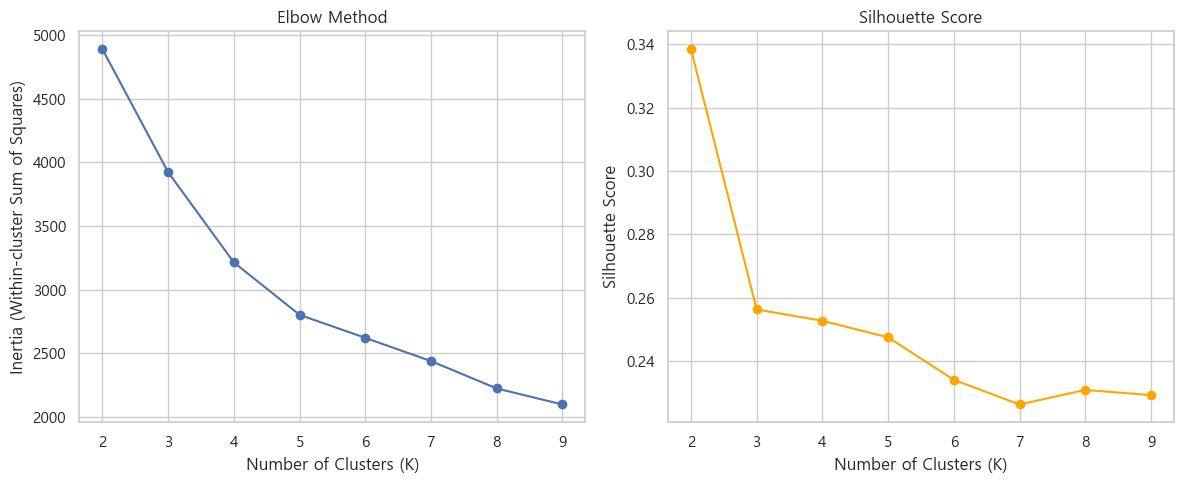

In [10]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = df_raw.copy()

selected_features = [
    'Active_Score', 'Info_Literacy_Index',
    'SNSÌîºÎìúÌôïÏù∏', 'SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä', 'OTTÏù¥Ïö©ÎπàÎèÑ', 'Í≤ÄÏÉâÎä•Î†•',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ1(ÏÇ¨Ïã§ÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ2(Í∑ºÍ±∞ÌôïÏù∏)',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ3(ÏÉÅÏóÖÏ†ÅÏùòÎèÑÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ4(Ï†ïÏπòÏ†ÅÏùòÎèÑÌôïÏù∏)'
]
df_selected = df[selected_features].dropna()

# Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_selected)

# K range Ï†ïÏùò
inertias = []
silhouettes = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    preds = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(X_scaled, preds))

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


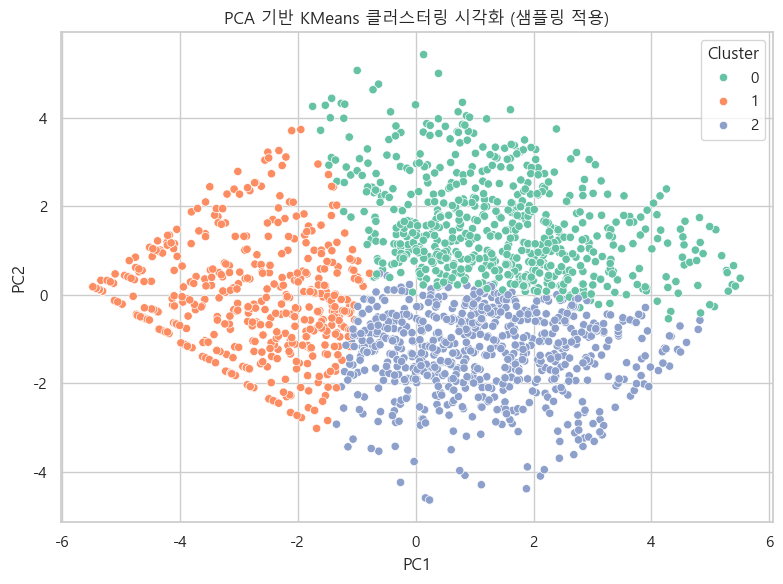

In [11]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = df_raw.copy()

# ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©Ìï† Ï£ºÏöî Î≥ÄÏàò ÏÑ†ÌÉù
features = [
    'Active_Score', 'Info_Literacy_Index',
    'SNSÌîºÎìúÌôïÏù∏', 'SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä', 'OTTÏù¥Ïö©ÎπàÎèÑ',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ1(ÏÇ¨Ïã§ÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ2(Í∑ºÍ±∞ÌôïÏù∏)',
    'Ï†ïÎ≥¥ÌåêÎ≥Ñ3(ÏÉÅÏóÖÏ†ÅÏùòÎèÑÌôïÏù∏)', 'Ï†ïÎ≥¥ÌåêÎ≥Ñ4(Ï†ïÏπòÏ†ÅÏùòÎèÑÌôïÏù∏)',
    'Ïó∞Î†π', 'ÏÜåÎìù', 'Í≤ÄÏÉâÎä•Î†•'
]
df_selected = df[features].dropna()

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# ÏãúÍ∞ÅÌôîÏö© ÏÉòÌîåÎßÅ (Î©îÎ™®Î¶¨ Ïù¥Ïäà Î∞©ÏßÄ)
sample_size = 2000 if len(X_pca) > 2000 else len(X_pca)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
df_sample = df_pca.sample(n=sample_size, random_state=42)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_sample, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("PCA Í∏∞Î∞ò KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏãúÍ∞ÅÌôî (ÏÉòÌîåÎßÅ Ï†ÅÏö©)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥Î•º ÏõêÎ≥∏ df_selectedÏôÄ Î≥ëÌï©
df_selected_clustered = df_selected.copy()
df_selected_clustered['Cluster'] = clusters

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Î≥ÄÏàò ÌèâÍ∑†Í∞í ÌôïÏù∏
cluster_summary = df_selected_clustered.groupby('Cluster')[features].mean().round(2)

# Í≤∞Í≥º Ï∂úÎ†•
print("üîç ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÌäπÏÑ± ÏöîÏïΩ:\n")
print(cluster_summary)


üîç ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÌäπÏÑ± ÏöîÏïΩ:

         Active_Score  Info_Literacy_Index  SNSÌîºÎìúÌôïÏù∏  SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä  OTTÏù¥Ïö©ÎπàÎèÑ  \
Cluster                                                                  
0                0.70                 0.51     6.79      6.81     7.23   
1                0.17                 0.21     0.38      0.40     3.58   
2                0.39                 0.69     1.88      1.98     6.32   

         Ï†ïÎ≥¥ÌåêÎ≥Ñ1(ÏÇ¨Ïã§ÌôïÏù∏)  Ï†ïÎ≥¥ÌåêÎ≥Ñ2(Í∑ºÍ±∞ÌôïÏù∏)  Ï†ïÎ≥¥ÌåêÎ≥Ñ3(ÏÉÅÏóÖÏ†ÅÏùòÎèÑÌôïÏù∏)  Ï†ïÎ≥¥ÌåêÎ≥Ñ4(Ï†ïÏπòÏ†ÅÏùòÎèÑÌôïÏù∏)    Ïó∞Î†π    ÏÜåÎìù  \
Cluster                                                                         
0               3.13         3.05            3.04            2.95  4.54  3.95   
1               1.93         1.82            1.80            1.76  7.16  2.93   
2               3.80         3.80            3.78            3.68  5.79  4.55   

         Í≤ÄÏÉâÎä•Î†•  
Cluster        
0        4.60  
1        2.55

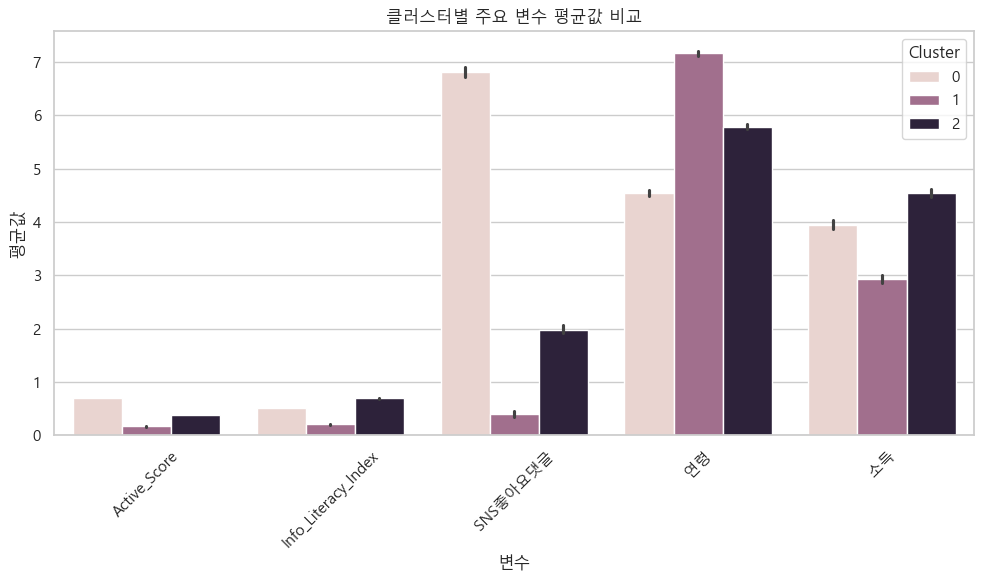

In [13]:
# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò ÏÑ†ÌÉù
plot_vars = ['Active_Score', 'Info_Literacy_Index', 'SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä', 'Ïó∞Î†π', 'ÏÜåÎìù']
plot_vars_1 = ['Active_Score', 'Info_Literacy_Index', 'AI_Device',
             'SNSÌîºÎìúÌôïÏù∏', 'SNSÏ¢ãÏïÑÏöîÎåìÍ∏Ä', 'Ïó∞Î†π']

# MeltÌï¥ÏÑú long-formÏúºÎ°ú Î≥ÄÌôò
df_melted = df_selected_clustered[['Cluster'] + plot_vars].melt(id_vars='Cluster')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='variable', y='value', hue='Cluster')
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Î≥ÄÏàò ÌèâÍ∑†Í∞í ÎπÑÍµê")
plt.xlabel("Î≥ÄÏàò")
plt.ylabel("ÌèâÍ∑†Í∞í")
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
